## Import Packages

In [1]:
check.packages = function(pkg) {
    new.pkg = pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = TRUE)
    sapply(pkg, require, character.only = TRUE)
}

In [11]:
check.packages(
    c(
        ## Procurement & Querying
        'RPostgreSQL',
        'RPostgres',
        'RJDBC',
        'httr',
        'jsonlite',

        ## Storing
        'googlesheets',

        ## Cleaning & Processing
        'dplyr',
        'lubridate',
        'stringr',
        'zoo',

        ## Visualizing
        'ggplot2',
        'ggpubr',

        ## Automation
        'rJava',
        'mailR',

        ## Packaging
        'devtools',
        'roxygen2'
    )
)

RPostgreSQL    RPostgres        RJDBC         httr     jsonlite googlesheets 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       dplyr    lubridate      stringr          zoo      ggplot2       ggpubr 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       rJava        mailR     devtools     roxygen2 
        TRUE         TRUE         TRUE         TRUE

## Import Data

In [3]:
importCSV = function (ticker) {
    
    df = read.csv(
        paste(
            'C:\\Users\\jchang\\Desktop\\Projects\\Stocks\\data\\',
            ticker, '.csv',
            sep = ''
        )
    )
    
    df = df %>%
        mutate(
            session = as.Date(session),
            ticker = as.character(ticker)
        ) %>%
        select(
            ticker,
            session,
            open,
            close,
            high,
            low,
            volume
        )
    
    return(df)
}

## Plot Data
##### Time Series

In [12]:
# dji = importCSV('.DJI')

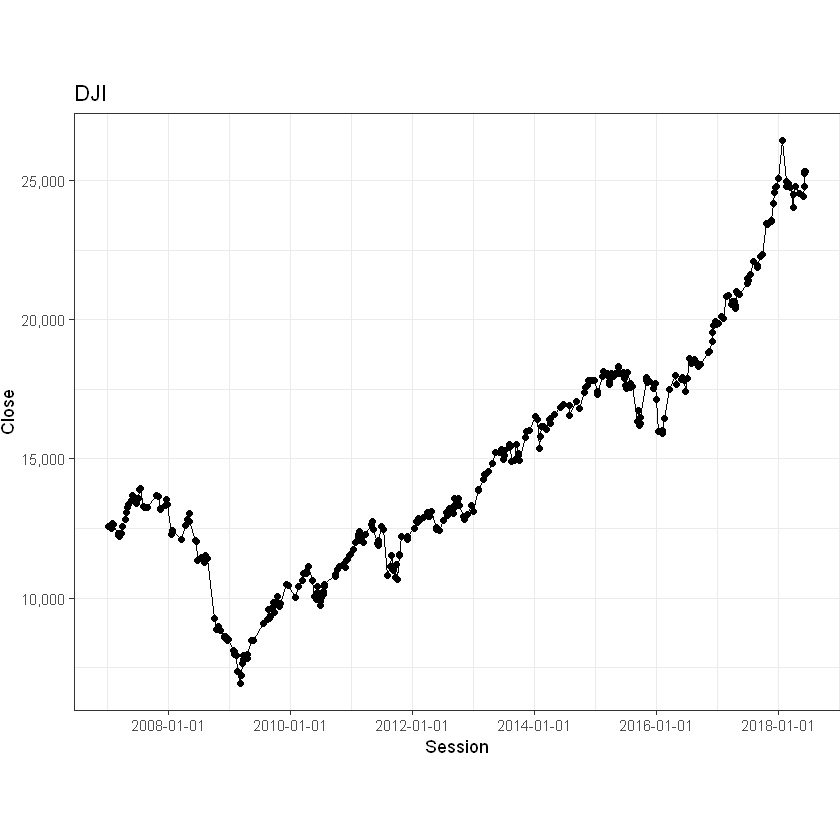

In [15]:
theme_set(theme_bw())

dji %>% filter(session >= '2007-01-01') %>%
    ggplot(
        aes(
            y = close,
            x = as.Date(session)
        )
    ) +
    geom_point() +
    geom_line() + 
    labs(
        title = 'DJI',
        y = 'Close',
        x = 'Session'
    ) +
    scale_y_continuous(
        labels = scales::comma,
        breaks = seq(0, 30000, by = 5000)
    ) +
    scale_x_date(date_breaks = '2 years') +
    theme(plot.margin = unit(c(0,0,0,0), 'cm')) +
    coord_fixed(ratio = 1/6)

In [17]:
dji %>%
    arrange(
        desc(session)
    ) #hmmmmmmmmmm...........
# lets just re download, antijoin on what's already queried, then try to ETL again

ticker,session,open,close,high,low,volume
.DJI,2018-06-12,25346.82,25320.73,25364.37,25247.04,25247.04
.DJI,2018-06-08,25209.29,25316.53,25325.63,25165.70,25165.70
.DJI,2018-06-07,25192.14,25241.41,25326.09,25164.48,25164.48
.DJI,2018-06-05,24820.12,24799.98,24838.78,24710.82,24710.82
.DJI,2018-05-31,24620.79,24415.84,24620.79,24352.15,24352.15
.DJI,2018-05-09,24399.18,24542.54,24586.48,24323.87,24323.87
.DJI,2018-04-17,24681.79,24786.63,24858.97,24681.79,24681.79
.DJI,2018-04-05,24313.91,24505.22,24622.26,24313.91,24313.91
.DJI,2018-04-03,23698.33,24033.36,24044.35,23664.33,23664.33
.DJI,2018-03-14,25086.97,24758.12,25130.12,24668.83,24668.83
